# Optimizing İSPARK Parking Lot Management in İstanbul

## YZV202E Project

### Batuhan Sal - 150210316
### Ömer Erdağ - 150210332
### Serdar Biçici - 150210331

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This project focuses on optimizing parking lot strategies in İstanbul (İSPARK). By the use of genetic algorithm techniques, with taking into considiration money, distance, parking time. The DNA is the parking lot indexes for each car and the project tries to optimize the DNA sequance with the best fitness score to put cars in best parking lots according to their needs efficiently.

### Importing Libraries

In [3]:
import requests
import json
import pandas as pd
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
from geopy.distance import geodesic

## Data Acquisition

#### Data of the project will be provided by "İBB Açık Veri Portalı" and datasets will be requested from respected APIs.

ps: Some of the cells are commented out because of proccessing time constraints, instead of requesting new data already requested dataset will be used.

In [4]:
def get_data(url):
    """
    Gets the data from the API and returns it as a list of dictionaries.

    args:
        url<str>: the url of the API

    returns:
        data<list>: the data from the API as a list of dictionaries
    """

    # getting the data from the API as a list of dictionaries
    response = requests.get(url)
    data = response.json()

    # altering the encoding as Turkish
    data = json.dumps(data, ensure_ascii=False).encode('utf8')
    data = json.loads(data)
    return data

### İSPARK Dataset

In [5]:
"""
# İSPARK API
park_url = "https://api.ibb.gov.tr/ispark/Park"
detay_url = "https://api.ibb.gov.tr/ispark/ParkDetay?id="

# getting the data
lot_data = get_data(park_url)
lots_id = []
for lot in lot_data:
    lots_id.append(lot["parkID"])
"""

'\n# İSPARK API\npark_url = "https://api.ibb.gov.tr/ispark/Park"\ndetay_url = "https://api.ibb.gov.tr/ispark/ParkDetay?id="\n\n# getting the data\nlot_data = get_data(park_url)\nlots_id = []\nfor lot in lot_data:\n    lots_id.append(lot["parkID"])\n'

In [6]:
"""
# initializing the data frame with the columns
columns = get_data(detay_url+"0")[0].keys()
df = pd.DataFrame(columns=columns)

# filling the data frame
for id in lots_id:
    data = get_data(detay_url + str(id))[0]
    df = df._append(pd.DataFrame(data, index=[0]), ignore_index=True)

# saving the data frame as a CSV file
df.to_csv("ispark_data.csv", index=False)
"""

'\n# initializing the data frame with the columns\ncolumns = get_data(detay_url+"0")[0].keys()\ndf = pd.DataFrame(columns=columns)\n\n# filling the data frame\nfor id in lots_id:\n    data = get_data(detay_url + str(id))[0]\n    df = df._append(pd.DataFrame(data, index=[0]), ignore_index=True)\n\n# saving the data frame as a CSV file\ndf.to_csv("ispark_data.csv", index=False)\n'

In [7]:
"""
df
"""

'\ndf\n'

In [8]:
"""
# tariff cleaning list for İSPARK
tariff_to_be_deleted = ["1-2 Saat Otobüs  : 10,00;2-3 Saat Otobüs  : 20,00;3-4 Saat Otobüs  : 30,00;4-5 Saat Otobüs  : 40,00;5-6 Saat Otobüs  : 50,00;6-7 Saat Otobüs  : 60,00;7-8 Saat Otobüs  : 70,00;8-9 Saat Otobüs  : 80,00;9-10 Saat Otobüs  : 100,00;10-11 Saat Otobüs  : 110,00;11-12 Saat Otobüs  : 120,00;12-13 Saat Otobüs  : 130,00;13-14 Saat Otobüs  : 140,00;14-15 Saat Otobüs  : 150,00;15-16 Saat Otobüs  : 160,00;16-17 Saat Otobüs  : 170,00;17-18 Saat Otobüs  : 180,00;18-19 Saat Otobüs  : 200,00;19-20 Saat Otobüs  : 210,00;20-21 Saat Otobüs  : 220,00;21-22 Saat Otobüs  : 230,00;22-23 Saat Otobüs  : 240,00;23-24 Saat Otobüs : 250,00",
                        "0-3 Saat Kamyon  : 45,00;0-3 Saat Minibüs-Kamyonet : 25,00;0-3 Saat Otomobil  : 25,00;0-3 Saat Tır  : 65,00;3-5 Saat Kamyon  : 55,00;3-5 Saat Minibüs-Kamyonet : 40,00;3-5 Saat Otomobil  : 35,00;3-5 Saat Tır  : 70,00;5-8 Saat Kamyon  : 100,00;5-8 Saat Minibüs-Kamyonet : 60,00;5-8 Saat Otomobil  : 45,00;5-8 Saat Tır  : 95,00;8-12 Saat Kamyon  : 130,00;8-12 Saat Minibüs-Kamyonet  : 75,00;8-12 Saat Otomobil  : 60,00;8-12 Saat Tır  : 124,00;Tam Gün Kamyon  : 150,00;Tam Gün Minibüs-Kamyonet : 120,00;Tam Gün Otomobil  : 70,00;Tam Gün Tır  : 160,00",
                        "Otomobil : 65,00", "Kamyon : 50,00;Kamyonet/Jeep/Minibüs : 40,00;Tır : 100,00", "30 Dk-1 Saat : 35,00;1-2 Saat : 40,00;2-3 Saat : 45,00;3-4 Saat : 50,00;4-5 Saat : 55,00;5-6 Saat : 60,00;6-7 Saat : 65,00;7-8 Saat : 70,00;8-9 Saat : 75,00;9-10 Saat : 80,00;10-11 Saat : 85,00;11-12 Saat : 90,00;12-13 Saat : 95,00;13-14 Saat : 100,00;14-15 Saat : 105,00;15-16 Saat : 110,00;16-17 Saat : 115,00;17-18 Saat : 120,00;18-19 Saat : 125,00;19-20 Saat : 130,00;20-21 Saat : 135,00;21-22 Saat : 140,00;22-23 Saat : 145,00;23-24 Saat : 150,00"]

print("Before cleaning:", len(df))

# cleaning the data frame
for i in range(len(df)):
    payment = df["tariff"][i]

    if payment in tariff_to_be_deleted:
        df = df.drop(i)
    elif "Tam Gün" not in payment:
        df = df.drop(i)

print("After cleaning:", len(df))
"""

'\n# tariff cleaning list for İSPARK\ntariff_to_be_deleted = ["1-2 Saat Otobüs  : 10,00;2-3 Saat Otobüs  : 20,00;3-4 Saat Otobüs  : 30,00;4-5 Saat Otobüs  : 40,00;5-6 Saat Otobüs  : 50,00;6-7 Saat Otobüs  : 60,00;7-8 Saat Otobüs  : 70,00;8-9 Saat Otobüs  : 80,00;9-10 Saat Otobüs  : 100,00;10-11 Saat Otobüs  : 110,00;11-12 Saat Otobüs  : 120,00;12-13 Saat Otobüs  : 130,00;13-14 Saat Otobüs  : 140,00;14-15 Saat Otobüs  : 150,00;15-16 Saat Otobüs  : 160,00;16-17 Saat Otobüs  : 170,00;17-18 Saat Otobüs  : 180,00;18-19 Saat Otobüs  : 200,00;19-20 Saat Otobüs  : 210,00;20-21 Saat Otobüs  : 220,00;21-22 Saat Otobüs  : 230,00;22-23 Saat Otobüs  : 240,00;23-24 Saat Otobüs : 250,00",\n                        "0-3 Saat Kamyon  : 45,00;0-3 Saat Minibüs-Kamyonet : 25,00;0-3 Saat Otomobil  : 25,00;0-3 Saat Tır  : 65,00;3-5 Saat Kamyon  : 55,00;3-5 Saat Minibüs-Kamyonet : 40,00;3-5 Saat Otomobil  : 35,00;3-5 Saat Tır  : 70,00;5-8 Saat Kamyon  : 100,00;5-8 Saat Minibüs-Kamyonet : 60,00;5-8 Saat Otomob

### Car Coordinates Dataset

#### For example car coordinates, minibus stops' coordinates are going to be used because of their realistic locations.

In [9]:
"""
# setting the url
url = "https://data.ibb.gov.tr/dataset/8b4391c0-e647-4635-aaf7-5baee24c6e81/resource/0d4fbb9f-cd5f-4005-aa57-6bb76db3fc58/download/istanbul_minibus_duraklari.geojson"

# getting the data from the API
response = requests.get(url)
data = response.json()

# creating the data frame
df_car = pd.DataFrame(data['features'])

# extracting the coordinates
df_car['coordinates'] = df_car['geometry'].apply(lambda x: x['coordinates'])
df_car['latitude'] = df_car['coordinates'].apply(lambda x: x[1])
df_car['longitude'] = df_car['coordinates'].apply(lambda x: x[0])

# dropping the unnecessary columns
df_car = df_car.drop(['type', 'geometry', 'coordinates'], axis=1)

# saving the data frame as a CSV file
df_car.to_csv('coordinates.csv', index=False)
"""

'\n# setting the url\nurl = "https://data.ibb.gov.tr/dataset/8b4391c0-e647-4635-aaf7-5baee24c6e81/resource/0d4fbb9f-cd5f-4005-aa57-6bb76db3fc58/download/istanbul_minibus_duraklari.geojson"\n\n# getting the data from the API\nresponse = requests.get(url)\ndata = response.json()\n\n# creating the data frame\ndf_car = pd.DataFrame(data[\'features\'])\n\n# extracting the coordinates\ndf_car[\'coordinates\'] = df_car[\'geometry\'].apply(lambda x: x[\'coordinates\'])\ndf_car[\'latitude\'] = df_car[\'coordinates\'].apply(lambda x: x[1])\ndf_car[\'longitude\'] = df_car[\'coordinates\'].apply(lambda x: x[0])\n\n# dropping the unnecessary columns\ndf_car = df_car.drop([\'type\', \'geometry\', \'coordinates\'], axis=1)\n\n# saving the data frame as a CSV file\ndf_car.to_csv(\'coordinates.csv\', index=False)\n'

## Loading the Existing Data

In [10]:
# read the data from the csv file
df = pd.read_csv("/content/drive/MyDrive/colab_datasets/yzv202e/ispark_data_son.csv")

# get the data from the csv file
car_data = pd.read_csv("/content/drive/MyDrive/colab_datasets/yzv202e/coordinates.csv")
car_data = car_data.dropna()

# drop first column
car_data = car_data.drop(car_data.columns[0], axis=1)
car_data = car_data.to_numpy()

## Park Class

#### Creating a "Park" class for properties of parking lots

In [11]:
class Park():
    # constructor
    def __init__(self, id, lat, lng, name, empty, capacity, prices):
        self.id = id
        self.lat = float(lat)
        self.lng = float(lng)
        self.capacity = capacity
        self.cars = capacity - empty
        self.capacity_rate = self.cars / self.capacity

        # if the parking lot is empty
        if self.capacity_rate == 1:
            self.empty = False
        else:
            self.empty = True

        self.name = name
        self.prices = {}

        # parsing the prices and adding them to the dictionary
        for price in prices.split(";"):

            saat, p = price.split(" : ")

            if saat == "Tam Gün":
                self.prices[saat] = int(p.split(",")[0])
                continue

            saat = saat.split(" ")

            if(saat[0] == "30"):
                self.prices["0,1"] = int(p.split(",")[0])

            else:
                p1,p2 = saat[0].split("-")
                self.prices[f"{p1},{p2}"] = int(p.split(",")[0])

    def isempty(self):
        """
        Returns whether the parking lot is empty or not.

        returns:
            empty<bool>: whether the parking lot is empty or not
        """

        return self.empty

    def get_capacity_rate(self):
        """
        Returns the capacity rate of the parking lot.

        returns:
            capacity_rate<float>: the capacity rate of the parking lot
        """

        return self.capacity_rate

    def add_car(self):
        """
        Adds a car to the parking lot.
        """

        self.cars += 1
        self.capacity_rate = self.cars / self.capacity

        if self.capacity_rate == 1:
            self.empty = False

    def remove_car(self):
        """
        Removes a car from the parking lot.
        """

        self.cars -= 1
        self.capacity_rate = self.cars / self.capacity
        self.empty = True

    def get_price(self, hour):
        """
        Returns the price of the parking lot according to the hour.

        args:
            hour<float>: the hour to calculate the price

        returns:
            price<float>: the price of the parking lot according to the hour
        """

        # if the parking time is a full day
        if hour == 24 or hour == "Tam Gün":
            return self.prices["Tam Gün"]

        # get the price according to the hour
        for key in self.prices.keys():

            if key == "Tam Gün":
                return self.prices[key]

            pr = str(key).split(",")
            p1,p2 = float(pr[0]), float(pr[1])

            if p1 <= hour <= p2:
                return self.prices[key]

        # if the hour is not in the prices
        else:

            return self.prices["Tam Gün"]


### Creating "Park" Objects

In [12]:
# index
i = 0

# list of parks
parks = []

# create the parks
for index,row in df.iterrows():

    park = Park(i,row["lat"],row["lng"],row["parkName"],row["emptyCapacity"],row["capacity"],row["tariff"])
    i += 1
    parks.append(park)

print("Parks are created")

Parks are created


## Car Class

#### Creating a "Car" class for properties of a random created car.

In [13]:
class Car():
    def __init__(self, location, gas_usage, hour):
        self.location = location
        self.parking_hour = hour
        self.gas_usage = gas_usage

### Random Car Dataset Generation

In [14]:
# setting the random seed
np.random.seed(31)

# setting the number of cars
car_number = 100

# selecting random car data
car_data = random.sample(list(car_data), car_number)

# list of cars
cars = []

# creating the cars
for i in range(len(car_data)):
    car = Car(car_data[i], np.random.rand() * 5 + 5, np.random.randint(1, 24))
    cars.append(car)

print("Cars are created")

Cars are created


## Genetic Algorithm

#### The genetic algorithm will optimize the parking lot - car matchups based on the fitness function. While doing so, it will also take the empty parking spaces in considiration.

In [15]:
def run_genetic_algorithm(parks, cars, population_size, generations, mutation_rate, mode=1, verbose=False):
    """
    Runs the genetic algorithm to find the best assignment of cars to parking lots.

    args:
        parks<list>: the list of parking lots
        cars<list>: the list of cars
        population_size<int>: the size of the population
        generations<int>: the number of generations
        mutation_rate<float>: the mutation rate
        mode<int>: the mode of the fitness function
        verbose<bool>: whether to print the progress or not

    returns:
        best_assignment<list>: the best assignment of cars to parking lots
        best_fitness<float>: the fitness of the best assignment
        fitness_scores<list>: the fitness scores of the generations
    """

    def fitness_function(park_index, cars, mode):
        """
        Calculates the fitness of the assignment of cars to parking lots.

        args:
            park_index<list>: the assignment of cars to parking lots
            cars<list>: the list of cars
            mode<int>: the mode of the fitness function

        returns:
            fitness<float>: the fitness of the assignment
        """

        # initializing the variables
        total_cost = 0
        space_utilization = 0
        user_satisfaction = 0

        # list of added parks
        added_parks = np.zeros(len(parks))

        # calculating the total cost
        for car,park in zip(cars,park_index):

            # calculating the distance
            distance = geodesic(car.location, (parks[park].lat, parks[park].lng)).km

            # calculating the gas cost
            gas_cost = (distance * (car.gas_usage+3))

            # calculating the parking cost
            parking_cost = parks[park].get_price(car.parking_hour)

            # calculating the total cost
            total_cost += gas_cost + parking_cost

            # if the parking lot is empty
            if parks[park].isempty():
                parks[park].add_car()
                added_parks[park] = 1
                space_utilization += parks[park].get_capacity_rate()
                user_satisfaction += 1
            # if the parking lot is full
            else:
                # penalize heavily if a parking lot is over capacity
                total_cost += 1000
                user_satisfaction -= 1
                space_utilization += 1

        # removing the cars from the parking lots
        for park in park_index:

            if added_parks[park] == 1:
                parks[park].remove_car()

        # calculating the average values
        total_cost /= len(cars)
        space_utilization /= len(cars)
        space_utilization = 1 - space_utilization
        space_utilization *= total_cost
        user_satisfaction = max(0, user_satisfaction / len(cars)) * total_cost

        # calculating the fitness if the mode is 1
        if mode == 1:
            return 1/ (0.8*total_cost - 0.1*space_utilization-0.1*user_satisfaction)
        # calculating the fitness if the mode is 2
        elif mode == 2:
            return 0.1 * space_utilization - 0.8 * total_cost + 0.1 * user_satisfaction


    def create_initial_population(parks, cars, population_size):
        """
        Creates the initial population of the genetic algorithm.

        args:
            parks<list>: the list of parking lots
            cars<list>: the list of cars
            population_size<int>: the size of the population

        returns:
            population<list>: the initial population of the genetic algorithm
        """

        return [np.random.randint(0, len(parks)-1, len(cars)) for _ in range(population_size)]


    def selection(population, fitnesses, population_size):
        """
        Selects the individuals for the next generation.

        args:
            population<list>: the population of the genetic algorithm
            fitnesses<list>: the fitnesses of the population
            population_size<int>: the size of the population

        returns:
            selected_individuals<list>: the selected individuals for the next generation
        """

        # Select the top half of the population
        indices = np.argsort(fitnesses)

        return [population[i] for i in indices[-(population_size // 2):]]

    def crossover(parent1, parent2):
        """
        Performs the crossover operation on the parents.

        args:
            parent1<list>: the first parent
            parent2<list>: the second parent

        returns:
            child1<list>: the first child
            child2<list>: the second child
        """

        # Randomly select a crossover point
        point = random.randint(1, len(parent1) - 1)

        # Create the children
        child1 = np.concatenate((parent1[:point], parent2[point:]))
        child2 = np.concatenate((parent2[:point], parent1[point:]))

        return child1, child2


    def mutate(individual, mutation_rate):
        """
        Mutates the individual.

        args:
            individual<list>: the individual to be mutated
            mutation_rate<float>: the mutation rate
        """

        # Mutate each gene with the given probability
        if random.random() < mutation_rate:
            index = random.randint(0, len(individual)-1)
            individual[index] = random.randint(0, len(parks)-1)


    def genetic_algorithm(parks,cars, population_size, generations, mutation_rate):
        """
        Runs the genetic algorithm to find the best assignment of cars to parking lots.

        args:
            parks<list>: the list of parking lots
            cars<list>: the list of cars
            population_size<int>: the size of the population
            generations<int>: the number of generations
            mutation_rate<float>: the mutation rate

        returns:
            best_individual<list>: the best assignment of cars to parking lots
            best_fitness<float>: the fitness of the best assignment
            fitness_scores<list>: the fitness scores of the generations
        """

        # Initializing the variables
        fitness_scores = []
        population = create_initial_population(parks, cars, population_size)
        best_individual = None
        best_fitness = -float('inf')

        # Running the genetic algorithm
        for generation in range(generations):

            # Calculating the fitness of the population
            fitnesses = [fitness_function(individual, cars,mode) for individual in population]

            # Updating the best individual and fitness
            if max(fitnesses) > best_fitness:
                best_fitness = max(fitnesses)
                best_individual = population[np.argmax(fitnesses)]

            # Selecting the individuals for the next generation
            selected_individuals = selection(population, fitnesses, population_size)
            next_generation = []

            # Creating the next generation
            while len(next_generation) < population_size:

                # Select two parents
                parents = random.sample(selected_individuals, 2)

                # Crossover the parents
                offspring1, offspring2 = crossover(parents[0], parents[1])

                # Mutate the offspring
                mutate(offspring1, mutation_rate)
                mutate(offspring2, mutation_rate)

                next_generation.extend([offspring1, offspring2])

            # Updating the population
            population = next_generation[:population_size]

            if verbose and generation % 100 == 0:
                print(f"Generation {generation + 1}, Best Fitness: {best_fitness}")

            # Appending the best fitness to the fitness scores
            fitness_scores.append(best_fitness)

        return best_individual, best_fitness, fitness_scores

    # Running the genetic algorithm
    best_assignment, best_fitness, fitness_scores = genetic_algorithm(parks, cars, population_size, generations, mutation_rate)

    return best_assignment, best_fitness, fitness_scores

### Average Distance Calculation

In [16]:
def avg_distance_prices(cars, parks, assignment):
    """
    Calculates the average distance and price of the assignment of cars to parking lots.

    args:
        cars<list>: the list of cars
        parks<list>: the list of parking lots
        assignment<list>: the assignment of cars to parking lots

    returns:
        avg_distance<float>: the average distance of the assignment
        avg_price<float>: the average price of the assignment
    """

    # initializing the variables
    avg_distance = 0
    avg_price = 0

    # calculating the average distance and price
    for car_index, lot_index in enumerate(assignment):
        distance = geodesic(cars[car_index].location, (parks[lot_index].lat, parks[lot_index].lng)).km
        avg_distance += distance
        avg_price += parks[lot_index].get_price(cars[car_index].parking_hour) + distance * (cars[car_index].gas_usage)

    # calculating the average distance and price
    avg_distance /= len(cars)
    avg_price /= len(cars)

    return avg_distance, avg_price

# Experiments

### Nearest Parking Lot Strategy

In [17]:
# initializing the variables
total = 0
opt_parks = []

# for each car, finding the closest parking lot
for car in cars:
    min_distance = float('inf')

    for park in parks:
        distance = geodesic(car.location, (park.lat, park.lng)).km

        if distance < min_distance:
            min_distance = distance
            closest_park = park

    total += min_distance
    opt_parks.append(closest_park.id)

print(f"Average distance between every car and nearest parking lots: {total/len(cars)} km")

Average distance between every car and nearest parking lots: 1.6466484295392114 km


In [18]:
# initializing the experiment variables
pop_size = [25,50,75,100]
mut_rate = [0.05,0.1,0.2,0.3]
gens = [100,500,1000,2000]

## Exp. No.1 Population Size Evaluation

#### Running the genetic algorithm for different inputs of "population" sizes.

In [19]:
pop_results = []
for pop in pop_size:
    best_assignment, best_fitness, fitness_scores = run_genetic_algorithm(parks.copy(), cars.copy(), pop, 100, 0.1, mode=1)
    print(f"Population Size: {pop}, Best Fitness: {best_fitness}")
    pop_results.append([best_assignment, best_fitness, fitness_scores])

Population Size: 25, Best Fitness: 0.005682366911681542
Population Size: 50, Best Fitness: 0.006094486690962655
Population Size: 75, Best Fitness: 0.0065591312522460445
Population Size: 100, Best Fitness: 0.006926753859802592


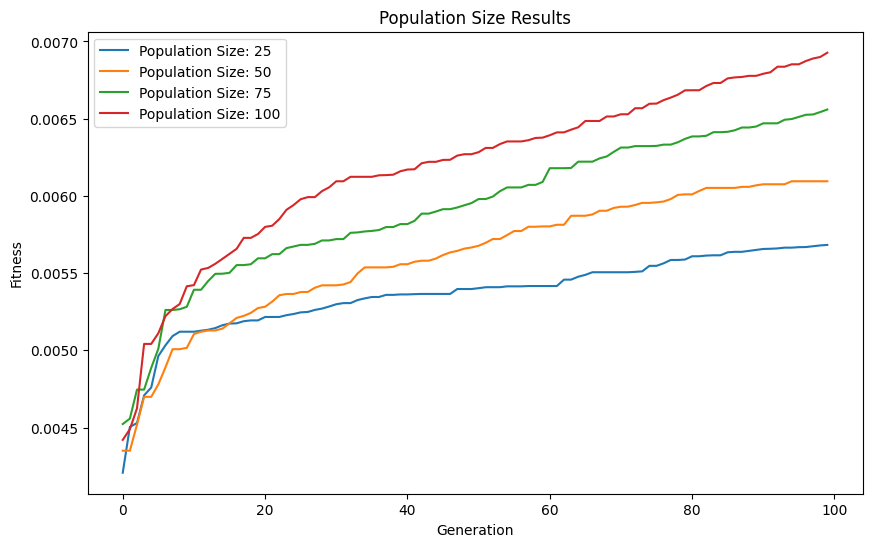

In [20]:
plt.figure(figsize=(10, 6))
for i, result in enumerate(pop_results):
    plt.plot(result[2], label=f"Population Size: {pop_size[i]}")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend()
plt.title("Population Size Results")
plt.show()

## Exp. No.2 Mutation Rate Evaluation

#### Running the genetic algorithm for different inputs of "mutation" rates.

In [21]:
mut_results = []
for mut in mut_rate:
    best_assignment, best_fitness, fitness_scores = run_genetic_algorithm(parks.copy(), cars.copy(), 100, 100, mut, mode=1)
    print(f"Mutation Rate: {mut}, Best Fitness: {best_fitness}")
    mut_results.append([best_assignment, best_fitness, fitness_scores])

Mutation Rate: 0.05, Best Fitness: 0.00619393152279666
Mutation Rate: 0.1, Best Fitness: 0.006772282461555419
Mutation Rate: 0.2, Best Fitness: 0.007126247375244133
Mutation Rate: 0.3, Best Fitness: 0.0071971322099571135


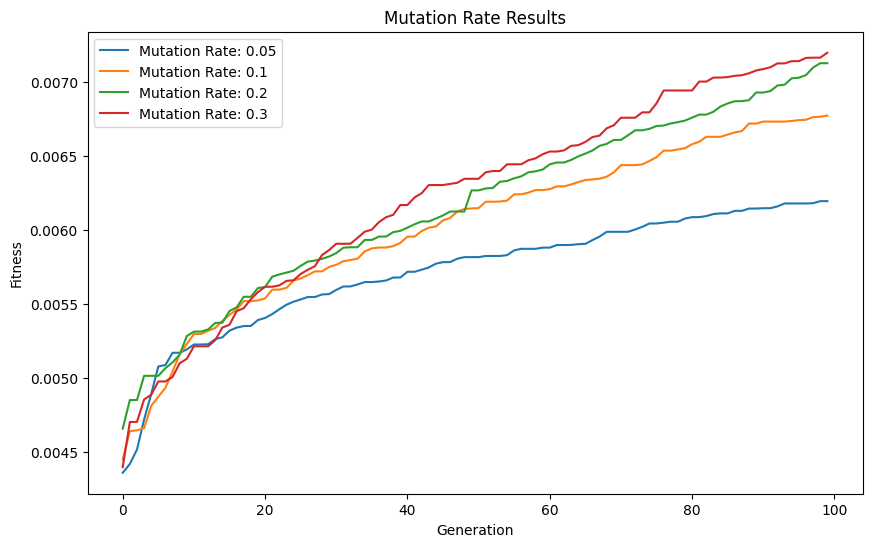

In [22]:
plt.figure(figsize=(10, 6))
for mut, result in zip(mut_rate, mut_results):
    plt.plot(result[2], label=f"Mutation Rate: {mut}")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Mutation Rate Results")
plt.legend()
plt.show()

## Exp. No.3 Generation Number Evaluation

#### Running the genetic algorithm for a high value of "generation" number.

In [23]:
best_assignment, best_fitness, fitness_scores = run_genetic_algorithm(parks.copy(), cars.copy(), 40, 2000, 0.3, mode=1, verbose=True)

Generation 1, Best Fitness: 0.004570692374687482
Generation 101, Best Fitness: 0.0068853305020740215
Generation 201, Best Fitness: 0.007666278536040096
Generation 301, Best Fitness: 0.008186535666011102
Generation 401, Best Fitness: 0.00872996147360189
Generation 501, Best Fitness: 0.009512656380102378
Generation 601, Best Fitness: 0.00980598955260733
Generation 701, Best Fitness: 0.010137674676181437
Generation 801, Best Fitness: 0.010421017229756304
Generation 901, Best Fitness: 0.010590319424624484
Generation 1001, Best Fitness: 0.01085113351046443
Generation 1101, Best Fitness: 0.010879597550354886
Generation 1201, Best Fitness: 0.011035162568409994
Generation 1301, Best Fitness: 0.011211063215954572
Generation 1401, Best Fitness: 0.01141600497390161
Generation 1501, Best Fitness: 0.011577290954724713
Generation 1601, Best Fitness: 0.012100384658087817
Generation 1701, Best Fitness: 0.01219908897222801
Generation 1801, Best Fitness: 0.012308720091103467
Generation 1901, Best Fitnes

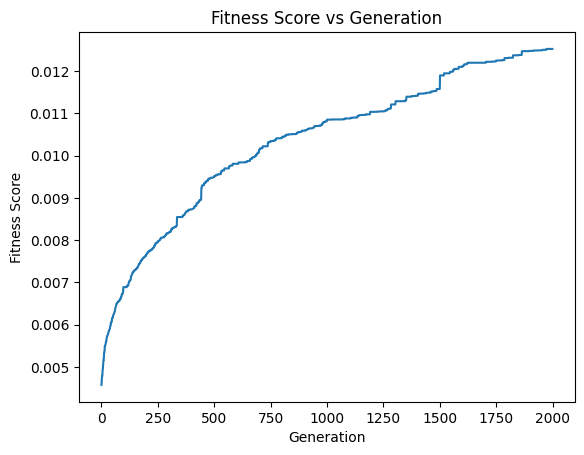

In [24]:
plt.plot(fitness_scores)
plt.xlabel("Generation")
plt.ylabel("Fitness Score")
plt.title("Fitness Score vs Generation")
plt.show()

## Exp. No.4 Different Fitness Functions' Evaluation

#### Running the genetic algorithm for different "fitness functions".

#### $1^{st}$ Fitness Function

In [25]:
best_assignment1, best_fitness1, fitness_scores1 = run_genetic_algorithm(parks.copy(), cars.copy(), 100, 1000, 0.3, mode=1, verbose=True)
print(f"Best Fitness: {best_fitness1}")

Generation 1, Best Fitness: 0.004298742337626183
Generation 101, Best Fitness: 0.007234316541646577
Generation 201, Best Fitness: 0.008699432793055956
Generation 301, Best Fitness: 0.009677262308527158
Generation 401, Best Fitness: 0.01032264990887191
Generation 501, Best Fitness: 0.010771962091751231
Generation 601, Best Fitness: 0.011262336478999924
Generation 701, Best Fitness: 0.011601269660921452
Generation 801, Best Fitness: 0.011986686554835785
Generation 901, Best Fitness: 0.012116842050750832
Best Fitness: 0.012613614437913511


#### $2^{nd}$ Fitness Function

In [26]:
best_assignment2, best_fitness2, fitness_scores2 = run_genetic_algorithm(parks.copy(), cars.copy(), 100, 1000, 0.3,mode=2,verbose=True)
print(f"Best Fitness: {best_fitness2}")

Generation 1, Best Fitness: -232.93561438873726
Generation 101, Best Fitness: -131.2052233389097
Generation 201, Best Fitness: -113.12338727564301
Generation 301, Best Fitness: -99.00752952945727
Generation 401, Best Fitness: -92.1217737763961
Generation 501, Best Fitness: -88.87816047234308
Generation 601, Best Fitness: -86.40329341456196
Generation 701, Best Fitness: -83.57724104373116
Generation 801, Best Fitness: -82.06839632155224
Generation 901, Best Fitness: -80.20960187850079
Best Fitness: -78.94233034635795


#### Comparing Results

#### $1^{st}$ Fitness Function

In [27]:
avg_distance, avg_price = avg_distance_prices(cars, parks, best_assignment1)

print(f"Average distance between cars and parking lots: {avg_distance} km")
print(f"Average price paid by cars: {avg_price} ₺")

Average distance between cars and parking lots: 4.86991603136533 km
Average price paid by cars: 113.82042184069624 ₺


#### $2^{nd}$ Fitness Function

In [28]:
avg_distance, avg_price = avg_distance_prices(cars, parks, best_assignment2)

print(f"Average distance between cars and parking lots: {avg_distance} km")
print(f"Average price paid by cars: {avg_price} TL")

Average distance between cars and parking lots: 4.433264020262411 km
Average price paid by cars: 115.91063893256882 TL


## Genetic Algorithm vs Nearest Parking Lot Strategy

#### Best Fitness Function ($2^{nd}$)

In [29]:
# Compare the fitness function assignmets with distances
avg_distance, avg_price = avg_distance_prices(cars, parks, best_assignment2)

print(f"Average distance between cars and parking lots: {avg_distance} km")
print(f"Average price paid by cars: {avg_price} TL")

Average distance between cars and parking lots: 4.433264020262411 km
Average price paid by cars: 115.91063893256882 TL


#### Nearest Parking Lot Strategy

In [30]:
# Compare the fitness function assignmets with distances
avg_distance, avg_price = avg_distance_prices(cars, parks, opt_parks)

print(f"Average distance between cars and parking lots: {avg_distance} km")
print(f"Average price paid by cars: {avg_price} TL")

Average distance between cars and parking lots: 1.6466484295392114 km
Average price paid by cars: 128.3676108958862 TL


### Comparing the Fitness Function Assignmets with Full Parking Lots

#### Nearest Parking Lot Strategy 

In [31]:
nearest_full = 0
added_park = []

for park in opt_parks:
    if parks[park].isempty():
        parks[park].add_car()
        added_park.append(park)
    else:
        nearest_full += 1

print(f"Number of cars assigned to full parking lots: {nearest_full}")

for park in added_park:
    parks[park].remove_car()

Number of cars assigned to full parking lots: 24


#### Fitness Function ($2^{nd}$)

In [32]:
nearest_full = 0
added_park = []
for park in best_assignment2:
    if parks[park].isempty():
        parks[park].add_car()
        added_park.append(park)
    else:
        nearest_full += 1

print(f"Number of cars assigned to full parking lots: {nearest_full}")

for park in added_park:
    parks[park].remove_car()

Number of cars assigned to full parking lots: 0
